S values (Closeness to Ideal): [0.65357143 0.73333333 0.59261905 0.32619048 0.08       0.49952381]

R values (Regret): [0.25       0.35       0.23333333 0.16666667 0.08       0.29166667]

Q values (Compromise Index): [0.75377254 1.         0.67626111 0.34890491 0.         0.71303945]

Final Rankings:
Based on Q: [5 4 3 6 1 2]
Based on S: [5 4 6 3 1 2]
Based on R: [5 4 3 1 6 2]



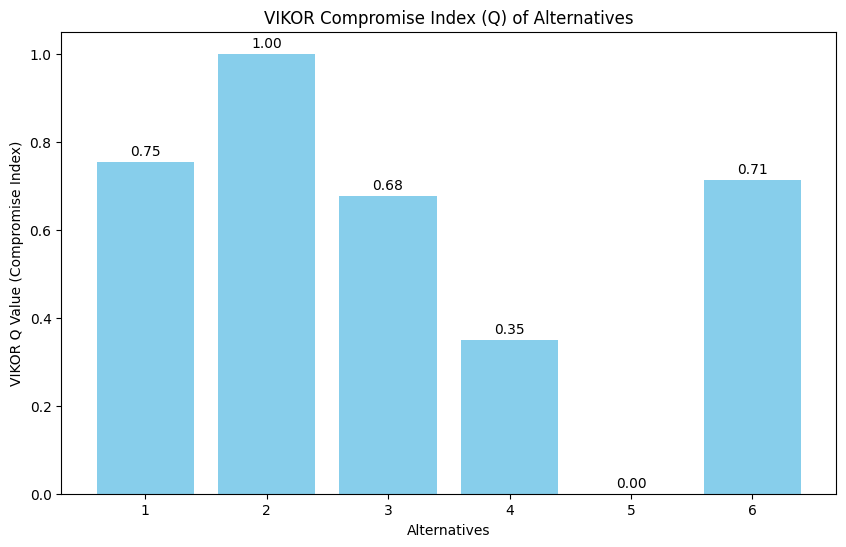

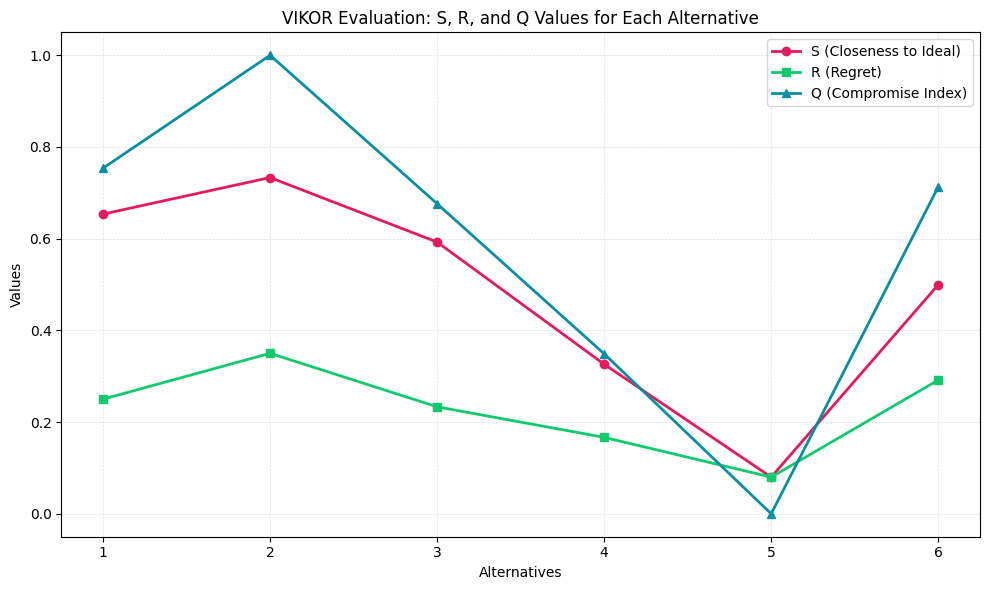

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_matrix(decision_matrix):
    """
    Normalize the decision matrix by linear normalization.
    """
    num_alternatives, num_criteria = decision_matrix.shape
    normalized_matrix = np.zeros_like(decision_matrix, dtype=float)

    for j in range(num_criteria):
        col_max = np.max(decision_matrix[:, j])
        col_min = np.min(decision_matrix[:, j])
        normalized_matrix[:, j] = (decision_matrix[:, j] - col_min) / (col_max - col_min)

    return normalized_matrix


def calculate_ideal_solutions(normalized_matrix):
    """
    Identify the ideal (best) and negative ideal (worst) solutions for each criterion.
    """
    ideal_solution = np.max(normalized_matrix, axis=0)  # Best values
    negative_ideal_solution = np.min(normalized_matrix, axis=0)  # Worst values
    return ideal_solution, negative_ideal_solution


def calculate_S_R(normalized_matrix, weights, ideal_solution, negative_ideal_solution):
    """
    Compute the S (closeness to the ideal solution) and R (regret) for each alternative.
    """
    num_alternatives = normalized_matrix.shape[0]
    S = np.zeros(num_alternatives)
    R = np.zeros(num_alternatives)

    for i in range(num_alternatives):
        S[i] = np.sum(weights * (ideal_solution - normalized_matrix[i, :]))
        R[i] = np.max(weights * (ideal_solution - normalized_matrix[i, :]))

    return S, R


def calculate_Q(S, R, v=0.5):
    """
    Calculate the VIKOR Q index for each alternative.
    """
    S_min, S_max = np.min(S), np.max(S)
    R_min, R_max = np.min(R), np.max(R)

    Q = np.zeros_like(S)
    for i in range(len(S)):
        Q[i] = v * (S[i] - S_min) / (S_max - S_min) + (1 - v) * (R[i] - R_min) / (R_max - R_min)

    return Q

def rank_alternatives(S, R, Q):
    """
    Rank the alternatives based on S, R, and Q values.
    """
    # Rank by ascending order of S, R, and Q (smallest values are best)
    S_rank = np.argsort(S) + 1  # Best is smallest S
    R_rank = np.argsort(R) + 1  # Best is smallest R
    Q_rank = np.argsort(Q) + 1  # Best is smallest Q
    return S_rank, R_rank, Q_rank

def plot_vikor_results(Q_values):
    """
    Plots the VIKOR Q values (compromise index) for each alternative as a bar chart.
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, len(Q_values) + 1), Q_values, color='skyblue')

    # Add numbers inside the bars near the top
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.04, f'{height:.2f}',
                 ha='center', va='top', fontsize=10, color='black')

    plt.xlabel('Alternatives')
    plt.ylabel('VIKOR Q Value (Compromise Index)')
    plt.title('VIKOR Compromise Index (Q) of Alternatives')
    plt.xticks(range(1, len(Q_values) + 1))
    plt.show()

def plot_srq_line(S, R, Q):
    """
    Plots the S, R, and Q values for each alternative as line plots.
    """
    # Define the alternatives (x-axis positions)
    alternatives = np.arange(1, len(S) + 1)

    # Create the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the S, R, and Q values as line plots
    plt.plot(alternatives, S, marker='o', label='S (Closeness to Ideal)', color='#e51a5e', linestyle='-', linewidth=2)
    plt.plot(alternatives, R, marker='s', label='R (Regret)', color='#12ca6e', linestyle='-', linewidth=2)
    plt.plot(alternatives, Q, marker='^', label='Q (Compromise Index)', color='#098fa4', linestyle='-', linewidth=2)

    # Add labels and title
    plt.xlabel('Alternatives')
    plt.ylabel('Values')
    plt.title('VIKOR Evaluation: S, R, and Q Values for Each Alternative')

    # Add legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

def vikor(decision_matrix, weights, v=0.5, plot=True):
    """
    Implement the VIKOR method for multi-criteria decision-making.
    """
    decision_matrix = np.array(decision_matrix)
    weights = np.array(weights)

    # Step 1: Normalize the decision matrix
    normalized_matrix = normalize_matrix(decision_matrix)

    # Step 2: Calculate ideal and negative ideal solutions
    ideal_solution, negative_ideal_solution = calculate_ideal_solutions(normalized_matrix)

    # Step 3: Calculate S (closeness to ideal) and R (regret)
    S, R = calculate_S_R(normalized_matrix, weights, ideal_solution, negative_ideal_solution)

    # Step 4: Calculate Q (compromise index)
    Q = calculate_Q(S, R, v)

    # Step 5: Rank alternatives
    S_rank, R_rank, Q_rank = rank_alternatives(S, R, Q)

    # Print results
    print("S values (Closeness to Ideal):", S)
    print("\nR values (Regret):", R)
    print("\nQ values (Compromise Index):", Q)
    print("\nFinal Rankings:")
    print("Based on Q:", Q_rank)
    print("Based on S:", S_rank)
    print("Based on R:", R_rank)
    print()

    # Plot results if required
    if plot:
      plot_vikor_results(Q)
      plot_srq_line(S, R, Q)


# Example Usage
# Decision matrix with 8 alternatives and 4 criteria
decision_matrix = [[8, 7, 2, 1],
                   [5, 3, 7, 5],
                   [7, 5, 6, 4],
                   [9, 9, 7, 3],
                   [11, 10, 3, 7],
                   [6, 9, 5, 4]]

# Normalized weights for the 4 criteria
weights = [0.35, 0.3, 0.1, 0.25]  # Criteria weights, normalized to sum to 1

# Run VIKOR
vikor(decision_matrix, weights, v=0.5, plot=True)